# INFO 2950 Final Project Phase 3 [Final Report]
### Bryce McHugh (bem74) and Teodoro Topa (tst42)

# Introduction:

### We carried out a primary (PART 1) analysis with the hope of determining significant factors that influence BMI within MLB and soccer players such as value and position. We also wanted to generally observe athlete BMI as it pertains to NIH health guidance as we have been under the impression from our own experience and outside opinions that BMI isn't a good indicator of obesity or weight health. 

### After dissapointing results from part 1, we then did a second analysis (PART 2) with the hope of determining a significant relationship between heights and weights of players across two sports: baseball using MLB data and soccer using EPL and MLS data. There is a common characterization that baseball players are unathletic and sometimes regarded as 'fat' athletes. Teo and I have played soccer and baseball respectively for years and follow the professional leagues of both sports. 

### Using our knowledge of data science and our expansive dataset, we set out to answer the following questions:

- Is there a significant difference between player BMI's across different positions?

- Is player value determined by wins above replacement (WAR) in baseball and player rating in soccer influenced by BMI in any way?

- Is there a significant difference in player height/weight when comparing across professional soccer and baseball leagues? 

- Can a professional athletes sport be predicted with any accuracy based on their height/weight (BMI) when limiting options to soccer and baseball?

### These questions were considered as typically in baseball, positions like catchers and first basemen are hefty and don't require a lot of running around or physical mobility, relatively speaking. Similarly in soccer, positions demand different physical characteristics as well. Furthermore, we wondered if BMI could influence player value because large players typically have more power and hit more home runs as a simple example in baseball.

### After carrying out these analyses, it became clear to us that there is some evidence of BMI influencing positions in MLB and soccer data but this was generally inconclusive due to smaller samplings among certain positions and generally patchy findings. We also determined no influence on player value due to massive sample size and a wide range of player physicalities and values. 

### Furthermore, it became clear to us that there is no definitive relationship between height and weight regression across a large sampling of players in both sports. When extrapolating this data using BMI, however, there is a significant difference in the distributions of player BMI across both sports. We were able to use this distribution difference to predict with relatively high accuracy (>80%) which sport a player falls under. After applying a machine learning model, we were able to increase our predictive accuracy to ~90%.

# Data Description (See Data Scraping.ipynb)

### Soccer Dataset Attributes:

- League: What soccer league the player plays in
- Team: What team the player is currently on
- Name: First and last name
- Position: The players position (Goalkeeper, Defender, Midfielder, or Forward)
- Age: Player age in years
- Height: Player height in inches
- Weight: Player weight in pounds
- BMI: Body Mass index of player, calculated by inputting height and weight into the following formula: BMI = 703 x weight / [height]-Squared
- Value: Player Value, taken from WhoScored.com. It is calculated using dozens of performance indicating datapoints.

### Baseball Dataset Attributes

- Team Abbreviation 
- Name
- Age
- Height
- Weight
- WAR (A very standardized baseball player value metric) 
- BMI: Body Mass index of player, see soccer attributes for calculation
- Position: Calculated most common position based on games played (P, C, 1B, 2B, 3B, SS, LF, RF, CF)

### This dataset was created to examine what body types lend themselves to soccer vs. baseball players and to analyze how body types play into various elements of both sports.

### Teodoro (tst42) was responsible for the scraping and creation of the soccer data while Bryce (bem74) was responsible for the MLB data. We both contributed to the BMI and height data generation and cleaning.

### The following processes may have influenced data aggregation:

- With the MLB data, the table that was scraped included the relevant BMI, age and position data we were looking for that could be compared across sports and leagues. The table also included WAR. Years in league and salary were omitted due to lack of relevance. 
- An important data consideration in baseball is that players play multiple positions hence the original table having a data column for each position played with games per position.  Having to put each player in one position resulted in losing some data but standardizing our dataset. 
- Soccer data was scraped and observed based on its relevance to our project. Performance related datapoints (goals scored, etc) were not scraped. Instead, we used a ‘value’ column.
- The ‘Value’ column in the soccer data comes from a CSV of data on WhoScored.com, a soccer statistics website. The algorithm WhoScored.com uses to calculate player value had a heavy effect on the findings which relate to player value.
- Soccer player value data is from last season, and roster data is from this season. There were a few players who had to be deleted from the soccer dataset because they did not have any value attributed to them from last season, because they are new players.

### Data was scraped from the following websites:

- https://www.mlssoccer.com/players
- https://scores.nbcsports.com/epl/rosters.asp
- https://www.baseball-reference.com/teams/ARI/2019-roster.shtml
- https://www.whoscored.com/Statistics

### Data was processed by:

- After scraping data related to our project from those websites, we needed to clean the data (remove rows with empty cells, organize the rows in a logical order, process height and weight strings into integers, add value column to the soccer data table)
- After data cleaning, we created a function to calculate BMI, and applied it to our datasets, adding a new attribute for each player.
- Finally, we joined the datasets of the two soccer leagues into one soccer player dataset. We added a ‘league’ row to keep track of where each player plays.
- People were not involved, all data was taken from the internet.

### Data can be found:
- Data Scraping.ipynb in our project folder
- Html files which were scraped from can be found at this link: https://github.com/bemphis/2950-Final-Project-bem74-tst42
- Player Values were taken from this link: https://www.whoscored.com/Statistics

In [1]:
import numpy
import pandas
from matplotlib import pyplot as plt
import scipy.stats
from sklearn.linear_model import LinearRegression
import math
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

# PART 1

# A. Total MLB BMI Distribution

In [2]:
# Load CSV from 'Combined Scraping.ipynb'
baseballData = pandas.read_csv('MLBPlayerInfo.csv')

In [3]:
# Gather players BMI and Values
BMI = baseballData['BMI']
Value = baseballData['WAR']

# Organize data by position class (infield, outfield)
Outfielders =  baseballData.loc[(baseballData['Position'] == 'CF') | (baseballData['Position'] == 'RF') | 
                          (baseballData['Position'] == 'LF')]
OFBMI = Outfielders['BMI']

Infielders = baseballData.loc[(baseballData['Position'] == 'C') | (baseballData['Position'] == 'B1') | 
                          (baseballData['Position'] == 'B2') | (baseballData['Position'] == 'B3') |  
                          (baseballData['Position'] == 'SS')]
IFBMI = Infielders['BMI']

# Organize data by individual positions (B1 = first base etc.)
P = baseballData.loc[baseballData['Position'] == 'P']
PBMI  = P['BMI']
C = baseballData.loc[baseballData['Position'] == 'C']
CBMI = C['BMI']
LF = baseballData.loc[baseballData['Position'] == 'LF']
LFBMI = LF['BMI']
B2 = baseballData.loc[baseballData['Position'] == '2B']
B2BMI = B2['BMI']
CF = baseballData.loc[baseballData['Position'] == 'CF']
CFBMI = CF['BMI']
B1 = baseballData.loc[baseballData['Position'] == '1B']
B1BMI = B1['BMI']
RF = baseballData.loc[baseballData['Position'] == 'RF']
RFBMI = RF['BMI']
B3 = baseballData.loc[baseballData['Position'] == '3B']
B3BMI = B3['BMI']
SS = baseballData.loc[baseballData['Position'] == 'SS']
SSBMI = SS['BMI']       

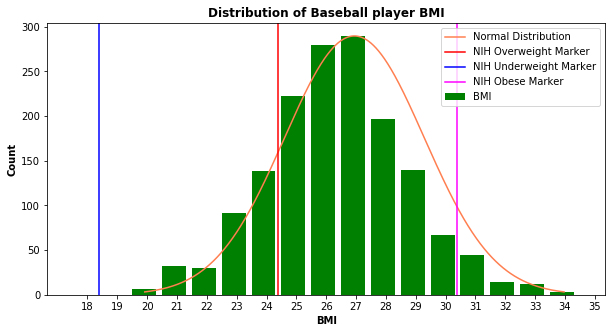

In [4]:
# Plot histogram of MLB BMI
bins = numpy.arange(18, 36)
plt.figure(figsize = (10, 5))
plt.hist(BMI, bins = bins, align = 'left', width = 0.8, color = 'green')
plt.xticks(bins)
plt.title('Distribution of Baseball player BMI', fontweight = 'bold')
plt.ylabel('Count', fontweight = 'bold')
plt.xlabel('BMI', fontweight = 'bold')

# Create normal curve of 3 stvs based on mu and sigma and place NIH weight guidance as vertical lines
x = numpy.linspace(26.945-(3*2.342), 26.945+(3*2.342), 1000)
y = scipy.stats.norm.pdf(x , 26.945, 2.342) * 1700
plt.plot(x, y, color = 'coral')
plt.axvline(24.4, color = 'red')
plt.axvline(18.4, color = 'blue')
plt.axvline(30.4, color = 'magenta')
plt.legend(['Normal Distribution', 'NIH Overweight Marker', 'NIH Underweight Marker', 'NIH Obese Marker', 'BMI'])

plt.show()

In [5]:
print('Baseball Player BMI Summary Statistics:', '\n', '\n', BMI.describe())

Baseball Player BMI Summary Statistics: 
 
 count    1567.000000
mean       26.945004
std         2.342121
min        20.540541
25%        25.620444
50%        26.959459
75%        28.362732
max        37.374330
Name: BMI, dtype: float64


#### There is approximately a normal distribution of player BMI, with a mean near 27. The sample has more variability and is less concentrated than soccer player data, with a standard deviation of 2.34. This means that according to this sample, over 90% of MLB players have a BMI of between 22.3 and 31.7 (within two standard deviations of the mean).

#### Additionally and interestingly, compared with soccer, many fewer players are in the healthy weight range according to their BMI. The majority of the sample is overweight, and over 50 players are obese!

# B. MLB Positional BMI Distributions

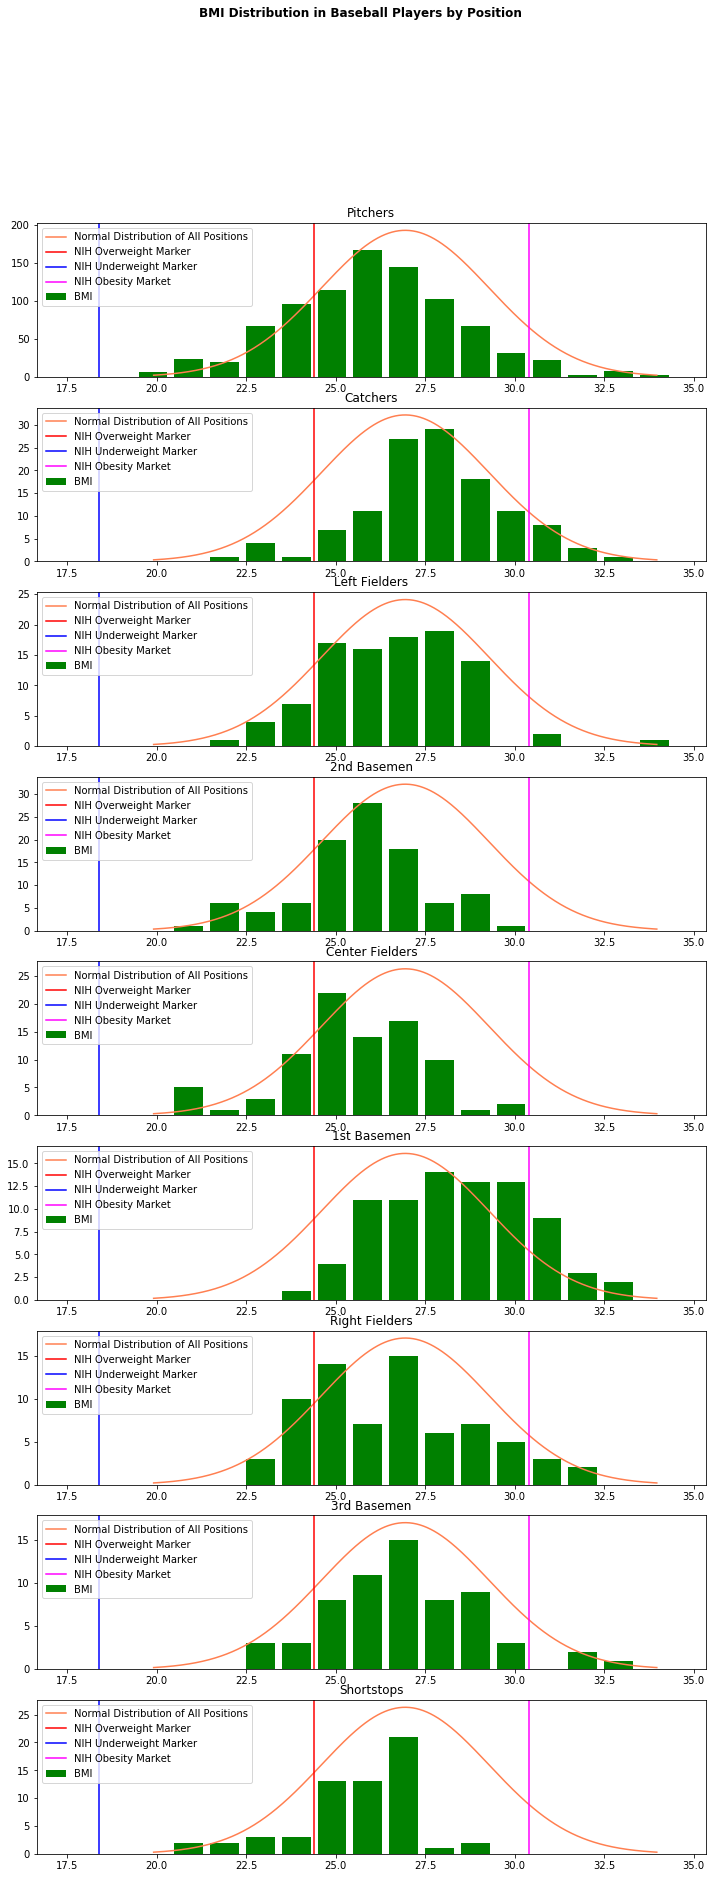

In [6]:
# Create histograms like the above execpt by position with overlaying normal curve of whole dataset

fig, (Ps, Cs, LFs, B2s, CFs, B1s, RFs, B3s, SSs) = plt.subplots(9, figsize = (12, 30))
fig.suptitle('BMI Distribution in Baseball Players by Position', fontweight = 'bold')

Ps.hist(PBMI, bins = bins, align = 'left', width = 0.8, color = 'green')

Cs.hist(CBMI, bins = bins, align = 'left', width = 0.8, color = 'green')

LFs.hist(LFBMI, bins = bins, align = 'left', width = 0.8, color = 'green')

B2s.hist(B2BMI, bins = bins, align = 'left', width = 0.8, color = 'green')

CFs.hist(CFBMI, bins = bins, align = 'left', width = 0.8, color = 'green')

B1s.hist(B1BMI, bins = bins, align = 'left', width = 0.8, color = 'green')

RFs.hist(RFBMI, bins = bins, align = 'left', width = 0.8, color = 'green')

B3s.hist(B3BMI, bins = bins, align = 'left', width = 0.8, color = 'green')

SSs.hist(SSBMI, bins = bins, align = 'left', width = 0.8, color = 'green')

# Plot an overlaying normal curve of whole dataset divided by some constant to scale to size

Ps.plot(x, y/1.5, color = 'coral')
Ps.title.set_text('Pitchers')
Ps.axvline(24.4, color = 'red')
Ps.axvline(18.4, color = 'blue')
Ps.axvline(30.4, color = 'magenta')
Ps.legend(['Normal Distribution of All Positions', 'NIH Overweight Marker', 'NIH Underweight Marker','NIH Obesity Market', 'BMI'])

Cs.plot(x, y/9, color = 'coral')
Cs.title.set_text('Catchers')
Cs.axvline(24.4, color = 'red')
Cs.axvline(18.4, color = 'blue')
Cs.axvline(30.4, color = 'magenta')
Cs.legend(['Normal Distribution of All Positions', 'NIH Overweight Marker', 'NIH Underweight Marker','NIH Obesity Market', 'BMI'])

LFs.plot(x, y/12, color = 'coral')
LFs.title.set_text('Left Fielders')
LFs.axvline(24.4, color = 'red')
LFs.axvline(18.4, color = 'blue')
LFs.axvline(30.4, color = 'magenta')
LFs.legend(['Normal Distribution of All Positions', 'NIH Overweight Marker', 'NIH Underweight Marker','NIH Obesity Market', 'BMI'])

B2s.plot(x, y/9, color = 'coral')
B2s.title.set_text('2nd Basemen')
B2s.axvline(24.4, color = 'red')
B2s.axvline(18.4, color = 'blue')
B2s.axvline(30.4, color = 'magenta')
B2s.legend(['Normal Distribution of All Positions', 'NIH Overweight Marker', 'NIH Underweight Marker','NIH Obesity Market', 'BMI'])

CFs.plot(x, y/11, color = 'coral')
CFs.title.set_text('Center Fielders')
CFs.axvline(24.4, color = 'red')
CFs.axvline(18.4, color = 'blue')
CFs.axvline(30.4, color = 'magenta')
CFs.legend(['Normal Distribution of All Positions', 'NIH Overweight Marker', 'NIH Underweight Marker','NIH Obesity Market', 'BMI'])

B1s.plot(x, y/18, color = 'coral')
B1s.title.set_text('1st Basemen')
B1s.axvline(24.4, color = 'red')
B1s.axvline(18.4, color = 'blue')
B1s.axvline(30.4, color = 'magenta')
B1s.legend(['Normal Distribution of All Positions', 'NIH Overweight Marker', 'NIH Underweight Marker','NIH Obesity Market', 'BMI'])

RFs.plot(x, y/17, color = 'coral')
RFs.title.set_text('Right Fielders')
RFs.axvline(24.4, color = 'red')
RFs.axvline(18.4, color = 'blue')
RFs.axvline(30.4, color = 'magenta')
RFs.legend(['Normal Distribution of All Positions', 'NIH Overweight Marker', 'NIH Underweight Marker','NIH Obesity Market', 'BMI'])

B3s.plot(x, y/17, color = 'coral')
B3s.title.set_text('3rd Basemen')
B3s.axvline(24.4, color = 'red')
B3s.axvline(18.4, color = 'blue')
B3s.axvline(30.4, color = 'magenta')
B3s.legend(['Normal Distribution of All Positions', 'NIH Overweight Marker', 'NIH Underweight Marker','NIH Obesity Market', 'BMI'])

SSs.plot(x, y/11, color = 'coral')
SSs.title.set_text('Shortstops')
SSs.axvline(24.4, color = 'red')
SSs.axvline(18.4, color = 'blue')
SSs.axvline(30.4, color = 'magenta')
SSs.legend(['Normal Distribution of All Positions', 'NIH Overweight Marker', 'NIH Underweight Marker','NIH Obesity Market', 'BMI'])

plt.show()

In [7]:
print('Pitcher Summary Satistics:', '\n', PBMI.describe(), '\n', '\n', \
      'Catcher Summary Statistics:','\n', CBMI.describe(),\
      '\n', '\n', 'Left Fielder Summary Statistics:','\n', LFBMI.describe(),\
      '\n', '\n', '2nd Baseman Summary Statistics:','\n', B2BMI.describe(), \
     '\n', '\n', 'Center Fielder Summary Statistics:','\n', CFBMI.describe(),\
     '\n', '\n', '1st Baseman Summary Statistics:','\n', B1BMI.describe(),\
     '\n', '\n', 'Right Fielder Summary Statistics:','\n', RFBMI.describe(),\
     '\n', '\n', '3rd Baseman Summary Statistics:','\n', B3BMI.describe(),\
     '\n', '\n', 'Shortstop Summary Statistics:','\n', SSBMI.describe())

Pitcher Summary Satistics: 
 count    873.000000
mean      26.658577
std        2.383744
min       20.540541
25%       25.033784
50%       26.776316
75%       28.120000
max       34.958716
Name: BMI, dtype: float64 
 
 Catcher Summary Statistics: 
 count    121.000000
mean      28.303922
std        1.980433
min       22.496000
25%       27.121914
50%       28.263469
75%       29.285856
max       33.223062
Name: BMI, dtype: float64 
 
 Left Fielder Summary Statistics: 
 count    99.000000
mean     27.184591
std       2.019278
min      22.313033
25%      25.745078
50%      27.384868
75%      28.396440
max      34.864114
Name: BMI, dtype: float64 
 
 2nd Baseman Summary Statistics: 
 count    98.000000
mean     26.362308
std       1.859537
min      21.697531
25%      25.634252
50%      26.519282
75%      27.530199
max      30.845918
Name: BMI, dtype: float64 
 
 Center Fielder Summary Statistics: 
 count    86.000000
mean     26.152791
std       1.941035
min      21.615751
25%      25.070

#### This was a lot to digest. Some key observations to notice:
 - Shortstops seem to be lighter than average.
 - Catchers and first basemen seem to be heavier than average.
 - The other positions (except pitcher) do not reflect the normal distribution found in the overall data.
 - Pitchers reflect the normal distribution found in the overall data, however they have more than 7 times the samples that any other position has.

#### Because of the small sample sizes associated with non-pitching positions, lets break down positions into infield (except pitchers) and outfield positions to further explore.

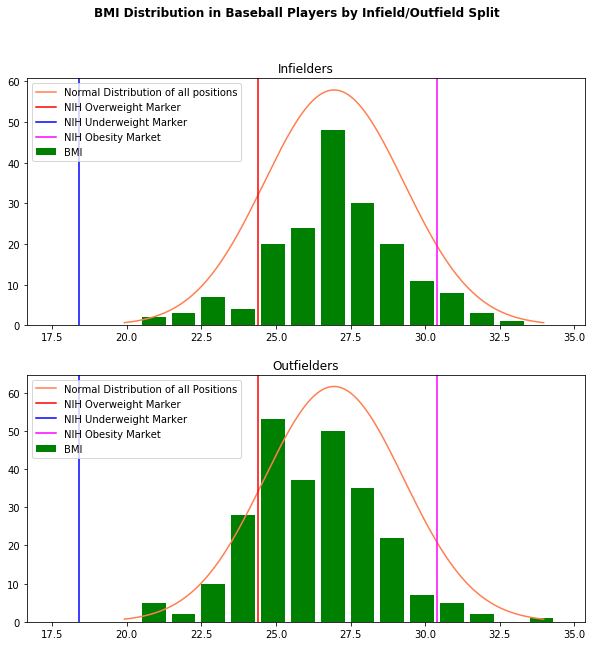

In [8]:
# Do the same as above except by position class instead of individual position

fig, (IFs, OFs) = plt.subplots(2, figsize = (10, 10))
fig.suptitle('BMI Distribution in Baseball Players by Infield/Outfield Split', fontweight = 'bold')

# Create histograms using data organized at beginning
IFs.hist(IFBMI, bins = bins, align = 'left', width = 0.8, color = 'green')
OFs.hist(OFBMI, bins = bins, align = 'left', width = 0.8, color = 'green')

# Plot normal curves divided by some constant to scale curve to size of distribution
IFs.plot(x, y/5, color = 'coral')
IFs.title.set_text('Infielders')
IFs.axvline(24.4, color = 'red')
IFs.axvline(18.4, color = 'blue')
IFs.axvline(30.4, color = 'magenta')
IFs.legend(['Normal Distribution of all positions', 'NIH Overweight Marker', 'NIH Underweight Marker','NIH Obesity Market', 'BMI'])

OFs.plot(x, y/4.7, color = 'coral')
OFs.title.set_text('Outfielders')
OFs.axvline(24.4, color = 'red')
OFs.axvline(18.4, color = 'blue')
OFs.axvline(30.4, color = 'magenta')
OFs.legend(['Normal Distribution of all Positions', 'NIH Overweight Marker', 'NIH Underweight Marker','NIH Obesity Market', 'BMI'])

plt.show()

In [9]:
print('Infielder Summary Satistics:', '\n', IFBMI.describe(), '\n', '\n', \
      'Catcher Summary Statistics:','\n', OFBMI.describe())

Infielder Summary Satistics: 
 count    181.000000
mean      27.577100
std        2.150848
min       21.107150
25%       26.398367
50%       27.616206
75%       28.885135
max       33.223062
Name: BMI, dtype: float64 
 
 Catcher Summary Statistics: 
 count    257.000000
mean      26.837338
std        2.117196
min       21.615751
25%       25.492495
50%       26.870222
75%       28.243243
max       34.864114
Name: BMI, dtype: float64


#### When further breaking down by position class there is an approximate normal distribution for both infielders and outfielders but outielders seem to be centered around a slightly lower BMI of 26. This is likely due to outfielder speed as a valuable characteristic as well as heavier positions like 1B and C being a part of the infield. 

# C. Looking at the relationship between BMI and player value based on WAR in MLB

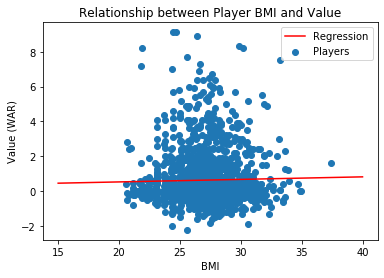

Slope: [0.0145242] 
 Correlation: 0.022781485200239232


In [10]:
# Generate regression model for BMI/Value in MLB
model = LinearRegression()
x = baseballData[['BMI']]
y = Value
model.fit(x, y)

# Plot BMI (x) against value in WAR (y) with regression line
plt.scatter(x, y)
plt.ylabel('Value (WAR)')
plt.xlabel('BMI')
p = numpy.linspace(15,40,1000)
q = model.coef_*p+model.intercept_
plt.plot(p, q, color = 'red')
plt.legend(['Regression', 'Players'])
plt.title('Relationship between Player BMI and Value')
plt.show()
print('Slope:', model.coef_, '\n', \
      'Correlation:', numpy.corrcoef(baseballData['BMI'],y)[0,1])

#### The scatterplot seems to show no real relationship between player WAR and BMI, and the regression line confirms the suspicion. This is likely due to the large scale of our data and that player value in WAR can be attributed to more than just power, for instance speed. Now lets do the same thing, except filtering by position.

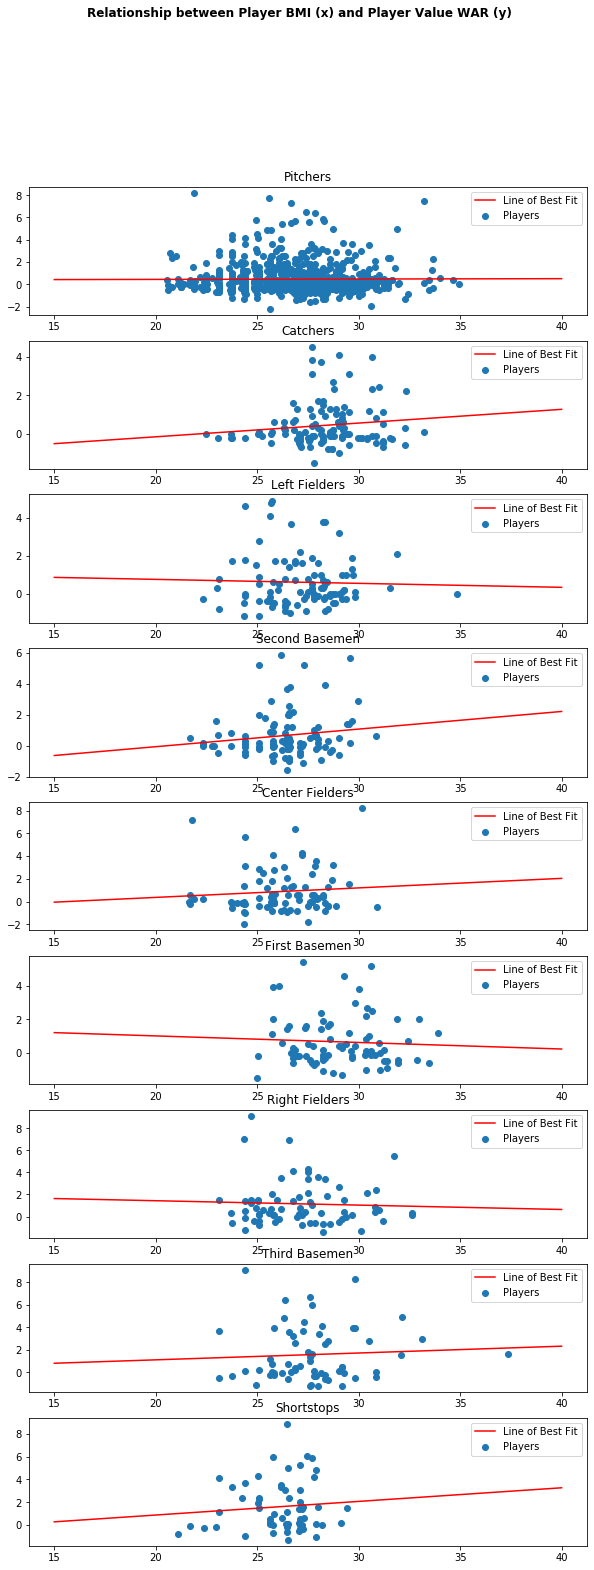

Pitcher Slope: [0.00328227] 
 Pitcher Correlation: 0.006300963632861961 

Catcher Slope: [0.07125052] 
 Catcher Correlation: 0.12568776062070128 

First Base Slope: [-0.03904173] 
 First Base Correlation: -0.05376925366501038 

Second Base Slope: [0.11403172] 
 Second Base Correlation: 0.1446599083591929 

Third Base Slope: [0.06059627] 
 Third Base Correlation: 0.0594859740122454 

Shortstop Slope: [0.1197667] 
 Shortstop Correlation: 0.09243908449483251 

Left Fielder Slope: [-0.02094238] 
 Left Fielder Correlation: -0.03138696091580889 

Center Fielder Slope: [0.08366732] 
 Center Fielder Correlation: 0.08558786125548945 

Right Fielder Slope: [-0.03961794] 
 Right Fielder Correlation: -0.04511998588510798 



In [11]:
# Variables labeled by position (p, b1 etc.) followed by attribute such as x or y

# Create regression for each position
p = numpy.linspace(15,40,1000)
px = P[['BMI']]
py = P['WAR']
model.fit(px, py)
pitcherx, pitcherb = model.coef_, model.intercept_

cx = C[['BMI']]
cy = C['WAR']
model.fit(cx, cy)
catcherx, catcherb = model.coef_, model.intercept_

b1x = B1[['BMI']]
b1y = B1['WAR']
model.fit(b1x, b1y)
firstx, firstb = model.coef_, model.intercept_

b2x = B2[['BMI']]
b2y = B2['WAR']
model.fit(b2x, b2y)
secondx, secondb = model.coef_, model.intercept_

b3x = B3[['BMI']]
b3y = B3['WAR']
model.fit(b3x, b3y)
thirdx, thirdb = model.coef_, model.intercept_

ssx = SS[['BMI']]
ssy = SS['WAR']
model.fit(ssx, ssy)
shortx, shortb = model.coef_, model.intercept_

lfx = LF[['BMI']]
lfy = LF['WAR']
model.fit(lfx, lfy)
leftx, leftb = model.coef_, model.intercept_

rfx = RF[['BMI']]
rfy = RF['WAR']
model.fit(rfx, rfy)
rightx, rightb = model.coef_, model.intercept_

cfx = CF[['BMI']]
cfy = CF['WAR']
model.fit(cfx, cfy)
centerx, centerb = model.coef_, model.intercept_

# Create figures of equal size for each positions plot
fig, (Ps, Cs, LFs, B2s, CFs, B1s, RFs, B3s, SSs) = plt.subplots(9, figsize = (10, 25))
fig.suptitle('Relationship between Player BMI (x) and Player Value WAR (y)', fontweight = 'bold')

# Create scatter plots for each position including regression line
Ps.scatter(px, py)
Ps.plot(p, pitcherx*p+pitcherb, color = 'red')
Ps.title.set_text('Pitchers')

Cs.scatter(cx, cy)
Cs.plot(p, catcherx*p+catcherb, color = 'red')
Cs.title.set_text('Catchers')

B1s.scatter(b1x, b1y)
B1s.plot(p, firstx*p+firstb, color = 'red')
B1s.title.set_text('First Basemen')

B2s.scatter(b2x, b2y)
B2s.plot(p, secondx*p+secondb, color = 'red')
B2s.title.set_text('Second Basemen')

B3s.scatter(b3x, b3y)
B3s.plot(p, thirdx*p+thirdb, color = 'red')
B3s.title.set_text('Third Basemen')

SSs.scatter(ssx, ssy)
SSs.plot(p, shortx*p+shortb, color = 'red')
SSs.title.set_text('Shortstops')

LFs.scatter(lfx, lfy)
LFs.plot(p, leftx*p+leftb, color = 'red')
LFs.title.set_text('Left Fielders')

CFs.scatter(cfx, cfy)
CFs.plot(p, centerx*p+centerb, color = 'red')
CFs.title.set_text('Center Fielders')

RFs.scatter(rfx, rfy)
RFs.plot(p, rightx*p+rightb, color = 'red')
RFs.title.set_text('Right Fielders')

# Add legend to each plot
Ps.legend(['Line of Best Fit', 'Players'])
Cs.legend(['Line of Best Fit', 'Players'])
B1s.legend(['Line of Best Fit', 'Players'])
B2s.legend(['Line of Best Fit', 'Players'])
B3s.legend(['Line of Best Fit', 'Players'])
SSs.legend(['Line of Best Fit', 'Players'])
LFs.legend(['Line of Best Fit', 'Players'])
CFs.legend(['Line of Best Fit', 'Players'])
RFs.legend(['Line of Best Fit', 'Players'])

plt.show()

print('Pitcher Slope:', pitcherx, '\n', \
      'Pitcher Correlation:', numpy.corrcoef(P['BMI'],py)[0,1], '\n')

print('Catcher Slope:', catcherx, '\n', \
      'Catcher Correlation:', numpy.corrcoef(C['BMI'],cy)[0,1], '\n')

print('First Base Slope:', firstx, '\n', \
      'First Base Correlation:', numpy.corrcoef(B1['BMI'],b1y)[0,1], '\n')

print('Second Base Slope:', secondx, '\n', \
      'Second Base Correlation:', numpy.corrcoef(B2['BMI'],b2y)[0,1], '\n')

print('Third Base Slope:', thirdx, '\n', \
      'Third Base Correlation:', numpy.corrcoef(B3['BMI'],b3y)[0,1], '\n')

print('Shortstop Slope:', shortx, '\n', \
      'Shortstop Correlation:', numpy.corrcoef(SS['BMI'],ssy)[0,1], '\n')

print('Left Fielder Slope:', leftx, '\n', \
      'Left Fielder Correlation:', numpy.corrcoef(LF['BMI'],lfy)[0,1], '\n')

print('Center Fielder Slope:', centerx, '\n', \
      'Center Fielder Correlation:', numpy.corrcoef(CF['BMI'],cfy)[0,1], '\n')

print('Right Fielder Slope:', rightx, '\n', \
      'Right Fielder Correlation:', numpy.corrcoef(RF['BMI'],rfy)[0,1], '\n')

#### It seems that once again, BMI does not have a significant relationship with player value in WAR when filtering by position. All the plots visually indicate this, and calculated slopes and correlation coefficients confirm this intuition.

#### Because smaller sample sizes with non pitchers we will further filter by position class (IF and OF).

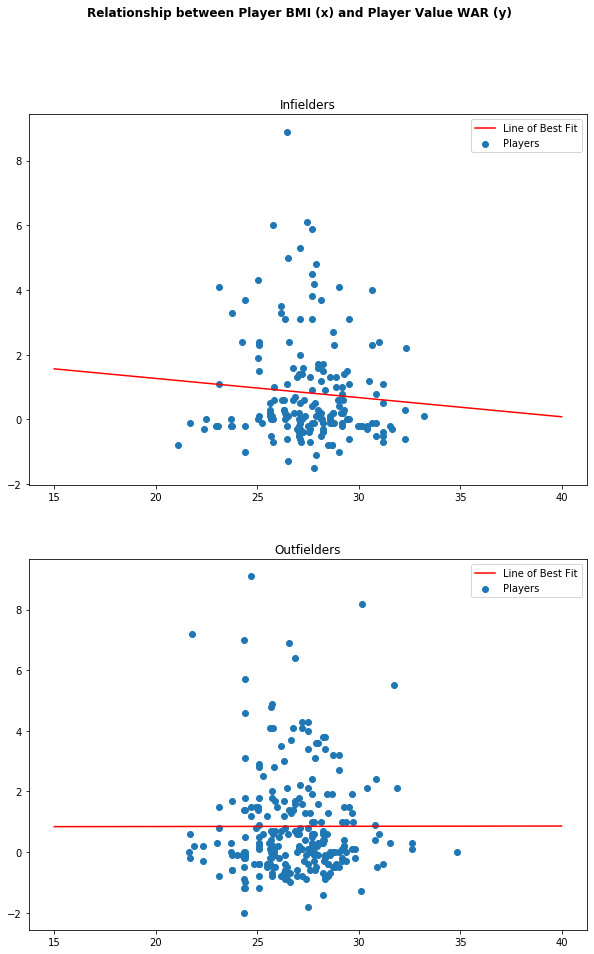

Infielder Slope: [-0.05924713] 
 Pitcher Correlation: -0.07719713215637358 

Outfielder Slope: [0.00080689] 
 Catcher Correlation: 0.00097907159347966 



In [12]:
# Finally plot BMI against value in WAR but by position class

p2 = numpy.linspace(15,40,1000)
ifx = Infielders[['BMI']]
ify = Infielders['WAR']
model.fit(ifx, ify)
inx, inb = model.coef_, model.intercept_

ofx = Outfielders[['BMI']]
ofy = Outfielders['WAR']
model.fit(ofx, ofy)
outx, outb = model.coef_, model.intercept_


fig, (IFs, OFs) = plt.subplots(2, figsize = (10, 15))
fig.suptitle('Relationship between Player BMI (x) and Player Value WAR (y)', fontweight = 'bold')


IFs.scatter(ifx, ify)
IFs.plot(p2, inx*p2+inb, color = 'red')
IFs.title.set_text('Infielders')

OFs.scatter(ofx, ofy)
OFs.plot(p2, outx*p2+outb, color = 'red')
OFs.title.set_text('Outfielders')


IFs.legend(['Line of Best Fit', 'Players'])
OFs.legend(['Line of Best Fit', 'Players'])


plt.show()

print('Infielder Slope:', inx, '\n', \
      'Pitcher Correlation:', numpy.corrcoef(Infielders['BMI'],ify)[0,1], '\n')

print('Outfielder Slope:', outx, '\n', \
      'Catcher Correlation:', numpy.corrcoef(Outfielders['BMI'],ofy)[0,1], '\n')

#### It seems that once again, BMI does not have a significant relationship with player value in terms of WAR when filtering by position class. All the plots visually indicate this, and calculated slopes and correlation coefficients confirm this intuition.

#### When thinking about why this is, an important consideration has to do with the way WAR works. It is an all encompassing statistic that calculates player value based on wins above replacement level (based on league averages). There are many ways to improve one's WAR including hitting homeruns, walking, stealing bases, playing good defense etc. Because of this, it leaves us with inconclusive results pertaining to BMI due to this and the fact we are working with full MLB data.

# D. Total Soccer BMI Distribution

In [13]:
# Load CSV from 'Combined Scraping.ipynb'
soccerData = pandas.read_csv('SoccerPlayerInfo.csv')

In [14]:
# Organize BMI and value data by position for later use
allBMI = soccerData['BMI']
allValue = soccerData['Rating']

EPL = pandas.DataFrame(soccerData.loc[soccerData['League'] == 'EPL'])

# Variables for position (f, m, d; forward, midfield, defense etc.)
f = pandas.DataFrame(soccerData.loc[soccerData['Position'] == 'Forward'])
fBMI = f['BMI']
m = pandas.DataFrame(soccerData.loc[soccerData['Position'] == 'Midfielder'])
mBMI = m['BMI']
d = pandas.DataFrame(soccerData.loc[soccerData['Position'] == 'Defender'])
dBMI = d['BMI']
g = pandas.DataFrame(soccerData.loc[soccerData['Position'] == 'Goalkeeper'])
gBMI = g['BMI']

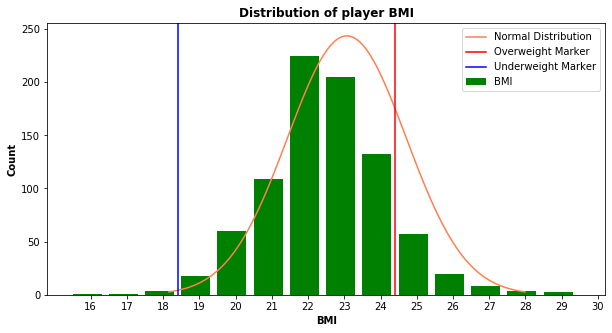

In [15]:
# Plot histogram of soccer BMI
bins = numpy.arange(16, 31)
plt.figure(figsize = (10, 5))
plt.hist(allBMI, bins = bins, align = 'left', width = 0.8, color = 'green')
plt.xticks(bins)
plt.title('Distribution of player BMI', fontweight = 'bold')
plt.ylabel('Count', fontweight = 'bold')
plt.xlabel('BMI', fontweight = 'bold')

# Create normal curve of 3 stvs based on mu and sigma and place NIH weight guidance as vertical lines
x = numpy.linspace(23.07-(3*1.638), 23.07+(3*1.638), 100)
y = scipy.stats.norm.pdf(x , 23.07, 1.638) * 1000
plt.plot(x, y, color = 'coral')
plt.axvline(24.4, color = 'red')
plt.axvline(18.4, color = 'blue')
plt.legend(['Normal Distribution', 'Overweight Marker', 'Underweight Marker', 'BMI'])

plt.show()

In [16]:
print('Soccer Player BMI Summary Statistics:', '\n', '\n', allBMI.describe())

Soccer Player BMI Summary Statistics: 
 
 count    847.000000
mean      23.078541
std        1.638165
min       16.286924
25%       22.148708
50%       23.010315
75%       24.110016
max       29.856520
Name: BMI, dtype: float64


#### There is approximately a normal distribution of player BMI, with a mean of about 23. The sample is also quite concentrated and has lower variability than in MLB data, with a standard deviation of 1.64. This means that according to this sample, over 90% of professional soccer players have a BMI of between 19.8 and 26.2 (within two standard deviations of the mean).

#### Additionally and interestingly, despite general disdain for BMI as a measure of health, the vast majority of the sample is within the healthy weight range, or only barely into the overweight range. This contrasts with baseball which is majority overweight.

# E. Soccer Positional BMI Distributions

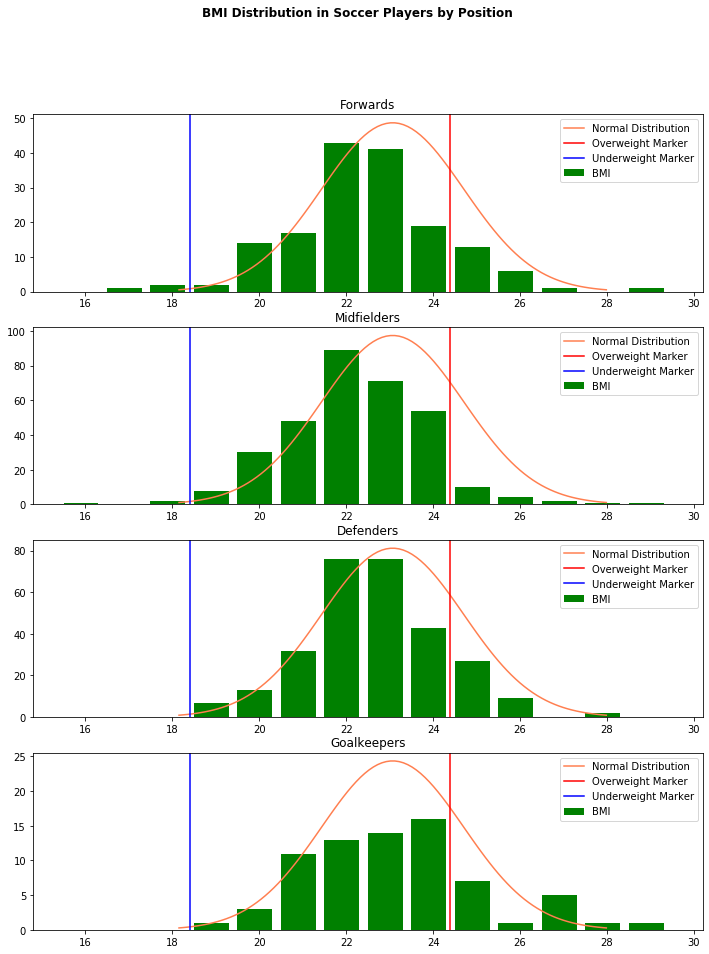

Forward Summary Satistics: 
 count    160.000000
mean      23.092226
std        1.719974
min       17.900463
25%       22.148708
50%       23.010315
75%       23.991572
max       29.418090
Name: BMI, dtype: float64 
 
 Midfielder Summary Statistics: 
 count    321.000000
mean      22.802581
std        1.600754
min       16.286924
25%       21.766748
50%       22.804931
75%       23.750000
max       29.856520
Name: BMI, dtype: float64 
 
 Defender Summary Statistics: count    285.000000
mean      23.218957
std        1.514666
min       19.384448
25%       22.296366
50%       23.085945
75%       24.265424
max       28.628378
Name: BMI, dtype: float64 
 
 Goalkeeper Summary Statistics: count    73.000000
mean     23.758772
std       1.893208
min      19.621511
25%      22.516447
50%      23.733553
75%      24.537061
max      29.494756
Name: BMI, dtype: float64


In [17]:
# Create histograms like the above execpt by position with overlaying normal curve of whole dataset

fig, (fwds, mids, defs, gks) = plt.subplots(4, figsize = (12, 15))
fig.suptitle('BMI Distribution in Soccer Players by Position', fontweight = 'bold')

fwds.hist(fBMI, bins = bins, align = 'left', width = 0.8, color = 'green')

mids.hist(mBMI, bins = bins, align = 'left', width = 0.8, color = 'green')

defs.hist(dBMI, bins = bins, align = 'left', width = 0.8, color = 'green')

gks.hist(gBMI, bins = bins, align = 'left', width = 0.8, color = 'green')

# Apply the normal distribution curves adjusted by dividing by a constant to scale
fwds.plot(x, y/5, color = 'coral')
fwds.title.set_text('Forwards')
fwds.axvline(24.4, color = 'red')
fwds.axvline(18.4, color = 'blue')
fwds.legend(['Normal Distribution', 'Overweight Marker', 'Underweight Marker', 'BMI'])

mids.plot(x, y/2.5, color = 'coral')
mids.title.set_text('Midfielders')
mids.axvline(24.4, color = 'red')
mids.axvline(18.4, color = 'blue')
mids.legend(['Normal Distribution', 'Overweight Marker', 'Underweight Marker', 'BMI'])

defs.plot(x, y/3, color = 'coral')
defs.title.set_text('Defenders')
defs.axvline(24.4, color = 'red')
defs.axvline(18.4, color = 'blue')
defs.legend(['Normal Distribution', 'Overweight Marker', 'Underweight Marker', 'BMI'])

gks.plot(x, y/10, color = 'coral')
gks.title.set_text('Goalkeepers')
gks.axvline(24.4, color = 'red')
gks.axvline(18.4, color = 'blue')
gks.legend(['Normal Distribution', 'Overweight Marker', 'Underweight Marker', 'BMI'])

plt.show()

print('Forward Summary Satistics:', '\n', fBMI.describe(), '\n', '\n', \
      'Midfielder Summary Statistics:','\n', mBMI.describe(),\
      '\n', '\n', 'Defender Summary Statistics:', dBMI.describe(),\
      '\n', '\n', 'Goalkeeper Summary Statistics:', gBMI.describe())

#### Except for Goalkeepers, even breaking down by position, there is approximately a normal distribution centered between 22 and 23. The graphs and summary statistics also show similar standard deviations. From this exploration, we can observe that there is not a significant correlation between player BMI and position. Goalkeepers however, while the mean and range are similar to the other positions, and a similarly low standard deviation exists, the distribution is slightly skewed to the left. Higher BMI is a bit more common among goalkeepers than other positions.

# F. Looking at the relationship between BMI and soccer player value based on player rating

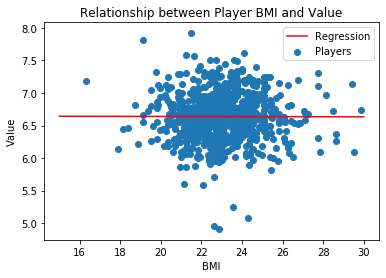

Slope: [-0.00061051] 
 Correlation: -0.0028009616817892954


In [18]:
# Create linear regression model for BMI/value
model = LinearRegression()
x = soccerData[['BMI']]
y = allValue
model.fit(x, y)

# Plot BMI (x) against value based on player ratings (y) with regression line
plt.scatter(x, y)
plt.ylabel('Value')
plt.xlabel('BMI')
p = numpy.linspace(15,30,1000)
q = model.coef_*p+model.intercept_
plt.plot(p, q, color = 'red')
plt.legend(['Regression', 'Players'])
plt.title('Relationship between Player BMI and Value')
plt.show()
print('Slope:', model.coef_, '\n', \
      'Correlation:', numpy.corrcoef(soccerData['BMI'],y)[0,1])

#### The above scatterplot seems to show no real relationship between player rating and BMI, and the regression line confirms the suspicion. Similar to the baseball results, this is likely a primary result of a large dataset including all players of all ratings and BMI's leading to an inconclusive regression. Now lets do the same thing, except filtering by position.

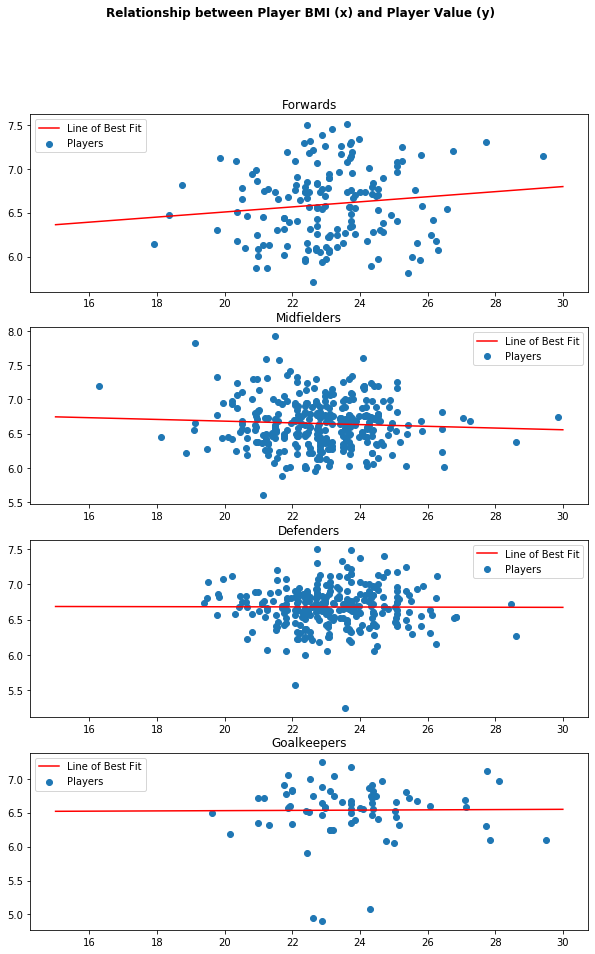

Forward Slope: [0.02891621] 
 Forward Correlation: 0.11747940850296221 

Midfielder Slope: [-0.01257792] 
 Midfielder Correlation: -0.05677211606264174 

Defender Slope: [-0.00081627] 
 Defender Correlation: -0.004251826849518719 

Goalkeeper Slope: [0.00194457] 
 GoalKeeper Correlation: 0.008678564844288965 



In [19]:
# Create regression model for each position
p = numpy.linspace(15,30,1000)
fx = f[['BMI']]
fy = f['Rating']
model.fit(fx, fy)
fwdx, fwdb = model.coef_, model.intercept_

mx = m[['BMI']]
my = m['Rating']
model.fit(mx, my)
midx, midb = model.coef_, model.intercept_

dx = d[['BMI']]
dy = d['Rating']
model.fit(dx, dy)
defx, defb = model.coef_, model.intercept_

gx = g[['BMI']]
gy = g['Rating']
model.fit(gx, gy)
gkx, gkb = model.coef_, model.intercept_

fig, (fwds, mids, defs, gks) = plt.subplots(4, figsize = (10, 15))
fig.suptitle('Relationship between Player BMI (x) and Player Value (y)', fontweight = 'bold')

# Create scatter plots and overlay regression line
fwds.scatter(fx, fy)
fwds.plot(p, fwdx*p+fwdb, color = 'red')
fwds.title.set_text('Forwards')

mids.scatter(mx, my)
mids.plot(p, midx*p+midb, color = 'red')
mids.title.set_text('Midfielders')

defs.scatter(dx, dy)
defs.plot(p, defx*p+defb, color = 'red')
defs.title.set_text('Defenders')

gks.scatter(gx, gy)
gks.plot(p, gkx*p+gkb, color = 'red')
gks.title.set_text('Goalkeepers')

# Add legend to each plot
fwds.legend(['Line of Best Fit', 'Players'])
mids.legend(['Line of Best Fit', 'Players'])
defs.legend(['Line of Best Fit', 'Players'])
gks.legend(['Line of Best Fit', 'Players'])

plt.show()

print('Forward Slope:', fwdx, '\n', \
      'Forward Correlation:', numpy.corrcoef(f['BMI'],fy)[0,1], '\n')
print('Midfielder Slope:', midx, '\n', \
      'Midfielder Correlation:', numpy.corrcoef(m['BMI'],my)[0,1], '\n')
print('Defender Slope:', defx, '\n', \
      'Defender Correlation:', numpy.corrcoef(d['BMI'],dy)[0,1], '\n')
print('Goalkeeper Slope:', gkx, '\n', \
      'GoalKeeper Correlation:', numpy.corrcoef(g['BMI'],gy)[0,1], '\n')

#### It seems that BMI does not have a significant relationship with player value when filtering by position. All the plots visually indicate this, and calculated slopes and correlation coefficients confirm this intuition. This goes along with the full soccer data lack of concrete regression and shows player rating doesn't have a concrete correlation with BMI.

# PART 2

In [20]:
# Gather data from CSVs exported from data scraping/cleaning notebook
MLBData = pandas.read_csv('MLBPlayerInfo.csv')
SoccerData = pandas.read_csv('SoccerPlayerInfo.csv')

# A. Is there a significant difference in height/weight regressions when comparing professional soccer and baseball players?

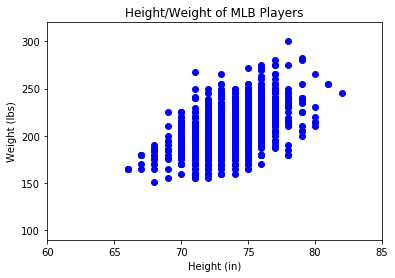

In [21]:
# Plot height (x) against weight (y) among MLB players
plt.scatter(MLBData['Height'], MLBData['Weight'], color='blue')
plt.title('Height/Weight of MLB Players')
plt.xlim(60, 85)
plt.ylim(90, 320)
plt.xlabel('Height (in)')
plt.ylabel('Weight (lbs)')
plt.show()

#### This plot shows MLB player height (x) as it relates to weight (y). The plot is about what we would expect as weight shows a very general trend upward with height although it's nothing concrete due to the massive scale of this data. The most common height range being 70-75 inches or so shows a large range of weights as one would expect from a sport like baseball with athletes of all different shapes and sizes. 

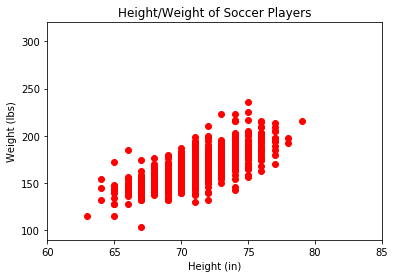

In [22]:
# Plot height (x) against weight (y) among Soccer players (EPL/MLS)
plt.scatter(SoccerData['Height'], SoccerData['Weight'], color='red')
plt.title('Height/Weight of Soccer Players')
plt.xlim(60, 85)
plt.ylim(90, 320)
plt.xlabel('Height (in)')
plt.ylabel('Weight (lbs)')
plt.show()

#### This plot shows soccer player height (x) as it relates to weight (y) with the same axes as above. This plot shows a more concrete linear relationship between height and weight in soccer as there is less room for large, slow players in soccer.  The most common height range also being 70-75 inches or so shows a smaller range of weights than baseball as one would expect due to the more intense physical demands of the sport.

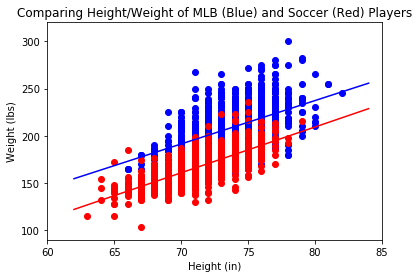

In [23]:
# Overlay the above plots and add a line of regression for both
plt.scatter(MLBData['Height'], MLBData['Weight'], color='blue')
plt.scatter(SoccerData['Height'], SoccerData['Weight'], color='red')
plt.title('Comparing Height/Weight of MLB (Blue) and Soccer (Red) Players')
plt.xlim(60, 85)
plt.ylim(90, 320)
plt.xlabel('Height (in)')
plt.ylabel('Weight (lbs)')

# Create soccer height/weight regression
SoccerReg = LinearRegression()
soc_x = SoccerData['Height'].values.reshape(-1,1)
soc_y = SoccerData['Weight'].values.reshape(-1,1)
SoccerReg.fit(soc_x, soc_y)

# Create MLB height/weight regression
MLBReg = LinearRegression()
mlb_x = MLBData['Height'].values.reshape(-1,1)
mlb_y = MLBData['Weight'].values.reshape(-1,1)
MLBReg.fit(mlb_x, mlb_y)

# Create MLB regression line plot
p_mlb = numpy.linspace(62,84,100)
q_mlb = MLBReg.coef_[0,0] * p_mlb + MLBReg.intercept_ 
plt.plot(p_mlb, q_mlb, color = 'blue')

# Create soccer regression line plot
p_soc = numpy.linspace(62,84,100)
q_soc = SoccerReg.coef_[0,0] * p_soc + SoccerReg.intercept_ 
plt.plot(p_soc, q_soc, color = 'red')

plt.show()

#### This plot shows a slight difference between height and weight in that soccer players are generally leaner with less variance than baseball players. The trendlines show a significant difference in y-intercept (weight) due to the same idea that soccer players are generally leaner even though height and weight are correlated on a very similar slope.

In [24]:
print('Slope of Soccer Height/Weight Regression: ', SoccerReg.coef_[0,0])
print('R-Squared of Soccer Height/Weight Regression: ', SoccerReg.score(soc_x, soc_y))
print('Intercept of Soccer Height/Weight Regression: ', SoccerReg.intercept_[0])

Slope of Soccer Height/Weight Regression:  4.846105111137425
R-Squared of Soccer Height/Weight Regression:  0.5609594295550016
Intercept of Soccer Height/Weight Regression:  -178.3472661160041


In [25]:
print('Slope of MLB Height/Weight Regression: ', MLBReg.coef_[0,0])
print('R-Squared of MLB Height/Weight Regression: ', MLBReg.score(mlb_x, mlb_y))
print('Intercept of MLB Height/Weight Regression: ', MLBReg.intercept_[0])

Slope of MLB Height/Weight Regression:  4.5926192417129
R-Squared of MLB Height/Weight Regression:  0.24699218803061818
Intercept of MLB Height/Weight Regression:  -130.10887125852366


#### These regression metrics make sense because both sports have a wide array of body types with such a large sample size, especially a sport like baseball where we would expect a greater variation in weights due to positions like catchers vs shortstops demanding vastly different physical characteristics. This trend is supported by the difference in intercept and the tighter R-Squared of soccer data indicating less variance. The larger variance in player physicality in MLB data leads to a less concrete regression. It can also be seen that generally weights of MLB players are higher than soccer based the significantly higher weight (y) intercept among baseball players. The intecepts are negative because a height of 0 ft 0 in isn't logical although the difference in y-axis weight intercept can be seen as roughly 48 lbs. The difference in slope appears insignificant which makes sense in such a large sample where slope just represents the change in weight as height increases.

## Permutation analysis of height/weight regressional significance 

In [26]:
# Create two functions that return permuted weights among MLB and Soccer datasets
def permuted_mlb_weight():
    return numpy.random.permutation(MLBData["Weight"].copy())

def permuted_soc_weight():
    return numpy.random.permutation(SoccerData["Weight"].copy())

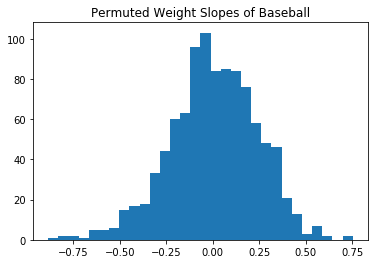

In [27]:
# Generate empty list and fill with permuted slopes of height/weight regression in MLB
slopes_perm_mlb = numpy.zeros(1000)

for i in range(1000):
    lm = LinearRegression()
    lm.fit(MLBData[['Height']].values.reshape(-1,1), permuted_mlb_weight().reshape(-1,1))
    slopes_perm_mlb[i] = lm.coef_[0,0]
    
# Plot permuted slopes as histogram
plt.hist(slopes_perm_mlb, bins=30)
plt.title('Permuted Weight Slopes of Baseball')
plt.show()

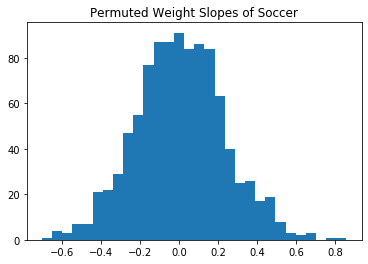

In [28]:
# Generate empty list and fill with permuted slopes of height/weight regression in soccer
slopes_perm_soc = numpy.zeros(1000)

for i in range(1000):
    lm = LinearRegression()
    lm.fit(SoccerData[['Height']].values.reshape(-1,1), permuted_soc_weight().reshape(-1,1))
    slopes_perm_soc[i] = lm.coef_[0,0]

# Plot permuted slopes as histogram
plt.hist(slopes_perm_soc, bins=30)
plt.title('Permuted Weight Slopes of Soccer')
plt.show()

#### The above permuted weight slopes of regression for both baseball and soccer show that the slope of the regression isn't significant at all. We already assumed this from the nominal difference in slope and somewhat inconclusive R-Squared scores but this shows that in a permuted sample of our player pools weights, there isn't a significant relationship between height and weight. When thinking about why this is, it is almost certainly due to the massive data size we have. When taking a permuted sample from such a large data pool with relatively high variance, it is to be expected that these variations would result in a normal distribution of slopes centered around 0 due to the high variability and massive scale of the data. This, however, does not mean there can't be a significant overall difference in BMI between the two sports because we saw a large difference in intercept.

# B. Can a professional athletes sport be predicted with any accuracy based on their BMI when limiting options to just soccer and baseball?

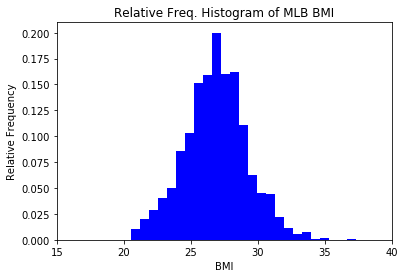

In [29]:
# Plot relative frequency histogram of MLB BMI 
plt.hist(MLBData['BMI'], bins=25, density=1, color='blue')
plt.xlim(15, 40)
plt.title('Relative Freq. Histogram of MLB BMI')
plt.xlabel('BMI')
plt.ylabel('Relative Frequency')
plt.show()

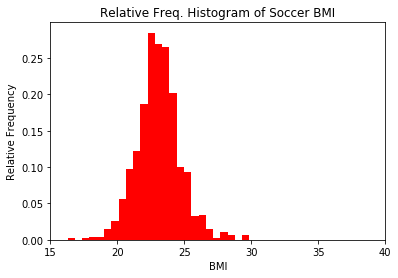

In [30]:
# Plot relative frequency histogram of soccer BMI 
plt.hist(SoccerData['BMI'], bins=25, density=1, color='red')
plt.xlim(15, 40)
plt.title('Relative Freq. Histogram of Soccer BMI')
plt.xlabel('BMI')
plt.ylabel('Relative Frequency')
plt.show()

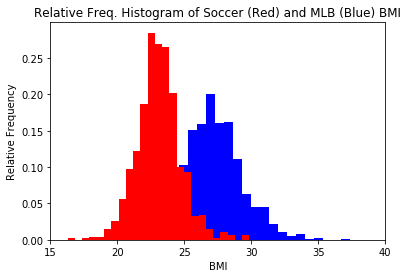

In [31]:
# Plot above relative frequency histograms of MLB and soccer BMI together  
plt.hist(MLBData['BMI'], bins=25, density=1, color='blue')
plt.hist(SoccerData['BMI'], bins=25, density=1, color='red')
plt.xlim(15, 40)
plt.title('Relative Freq. Histogram of Soccer (Red) and MLB (Blue) BMI')
plt.xlabel('BMI')
plt.ylabel('Relative Frequency')
plt.show()

In [32]:
print('Soccer BMI Mean: ', SoccerData['BMI'].mean())
print('MLB BMI Mean: ', MLBData['BMI'].mean())
print('Soccer BMI Standard Deviation: ', SoccerData['BMI'].std())
print('MLB BMI Standard Deviation: ', MLBData['BMI'].std())

Soccer BMI Mean:  23.07854060660071
MLB BMI Mean:  26.945003613304507
Soccer BMI Standard Deviation:  1.6381645793740578
MLB BMI Standard Deviation:  2.3421206086706214


#### After plotting these relative frequency histograms of BMI together, it is clear that soccer has a tighter distribution of BMI both visually as the relative frequency around the mean is much higher than in MLB and numerically as soccer's BMI standard deviation is about ~30% lower than that of MLB. It is also clear there is a difference in mean BMI of about 4 units or ~20%

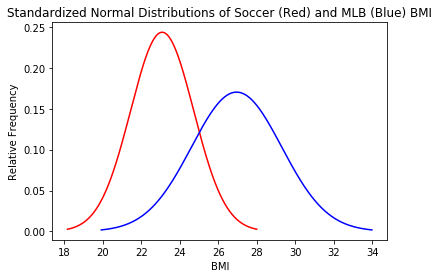

In [33]:
# Create variables storing the outputted normal distribution metrics
mu_soc = 23.0785
sigma_soc = 1.6382
mu_mlb = 26.9450
sigma_mlb = 2.3421

# Create 1000 length x-axis evenly spaced list based on 3 standard deviations of data
x_soc = numpy.linspace(mu_soc - 3 * sigma_soc, mu_soc + 3 * sigma_soc, 1000)
x_mlb = numpy.linspace(mu_mlb - 3 * sigma_mlb, mu_mlb + 3 * sigma_mlb, 1000)

# Create 1000 y-axis relative frequencies (probabilities) based on normal parameters
y_soc = scipy.stats.norm.pdf(x_soc, mu_soc, sigma_soc)
y_mlb = scipy.stats.norm.pdf(x_mlb, mu_mlb, sigma_mlb)

# Generate standardized normal curves based on the parameters above
plt.plot(x_soc, y_soc, color='red')
plt.plot(x_mlb, y_mlb, color='blue')

# Labels
plt.title('Standardized Normal Distributions of Soccer (Red) and MLB (Blue) BMI')
plt.xlabel('BMI')
plt.ylabel('Relative Frequency')

plt.show()

#### Using the true normal distribution metrics provided by our vast data sampling, we generated the above plots that represent relative frequencies (also probability) of a given BMI per sport including 3 standard deviations of range. There is some obvious and expected overlap across the 22-26 BMI range, but when focusing on each sports mean and highest frequency, there is an enormous difference in relative frequency/probability. 

In [34]:
# Compile x and y values of the above normal curves for use in probability
soccer_prob = [x_soc, y_soc]
mlb_prob = [x_mlb, y_mlb]

# Function to find nearest value since above curves have a finite number of data points
def nearest_i(arr, val):
    array = numpy.asarray(arr)
    idx = (numpy.abs(array - val)).argmin()
    return idx

# Find and print the probability of each sport based on these normal distributions
def sport_prob_bmi(bmi):
    # MLB Probability
    i_mlb = nearest_i(mlb_prob[0], bmi)
    prob_mlb = mlb_prob[1][i_mlb]
    
    # Soccer Probability
    i_soc = nearest_i(soccer_prob[0], bmi)
    prob_soc = soccer_prob[1][i_soc]
    
    total_prob = prob_mlb+prob_soc
    
    # Print Results
    print('Probability of EPL/MLS Soccer Player Based on BMI = ' + str(bmi) + ': ', prob_soc/total_prob)
    print('Probability of MLB Baseball Player Based on BMI = ' + str(bmi) + ': ', prob_mlb/total_prob)

#### Using the normal distributions generated above, we can take these as probability distributions for each sport with respect to BMI. With this information, we created a function sport_prob_bmi() which prints the relative probability of each sport based on BMI alone. 

In [35]:
# Test some BMI probabilities
sport_prob_bmi(20)
print()
sport_prob_bmi(22)
print()
sport_prob_bmi(24)
print()
sport_prob_bmi(26)
print()
sport_prob_bmi(28)
print()
sport_prob_bmi(30)

Probability of EPL/MLS Soccer Player Based on BMI = 20:  0.9520590798567531
Probability of MLB Baseball Player Based on BMI = 20:  0.047940920143246885

Probability of EPL/MLS Soccer Player Based on BMI = 22:  0.9144786562573021
Probability of MLB Baseball Player Based on BMI = 22:  0.0855213437426979

Probability of EPL/MLS Soccer Player Based on BMI = 24:  0.7293606317460699
Probability of MLB Baseball Player Based on BMI = 24:  0.2706393682539301

Probability of EPL/MLS Soccer Player Based on BMI = 26:  0.24122714963644826
Probability of MLB Baseball Player Based on BMI = 26:  0.7587728503635518

Probability of EPL/MLS Soccer Player Based on BMI = 28:  0.01725164640723837
Probability of MLB Baseball Player Based on BMI = 28:  0.9827483535927616

Probability of EPL/MLS Soccer Player Based on BMI = 30:  0.03593898203396808
Probability of MLB Baseball Player Based on BMI = 30:  0.9640610179660319


#### These results show some samples of the relative probabilities of BMI based on the standardized normal curves presented above, but how do they match up against our original, true data?

In [36]:
# Create a function that predicts sport in a simple manner based on greater probability
def sport_based_bmi(bmi):
    # MLB Probability
    i_mlb = nearest_i(mlb_prob[0], bmi)
    prob_mlb = mlb_prob[1][i_mlb]
    
    # Soccer Probability
    i_soc = nearest_i(soccer_prob[0], bmi)
    prob_soc = soccer_prob[1][i_soc]
        
    # Return higher probability sport
    if prob_soc > prob_mlb:
        return 'Soccer'
    else:
        return 'Baseball'

#### Using these probabilities, we created a function sport_based_bmi() that returns a binary sport prediciton (soccer or baseball) based on BMI alone. 

In [37]:
# Apply the prediction function to the original data
MLBData['Sport Prediction'] = [sport_based_bmi(b) for b in MLBData['BMI']]
SoccerData['Sport Prediction'] = [sport_based_bmi(b) for b in SoccerData['BMI']]

In [38]:
MLBData.head(5)

,Unnamed: 0,Team,Name,Age,Height,Weight,WAR,BMI,Position,Sport Prediction
0,0,ARI,Nick Ahmed,29,74,195,4.3,25.033784,SS,Baseball
1,1,ARI,Abraham Almonte,30,69,210,0.6,31.008192,RF,Baseball
2,2,ARI,Matt Andriese,29,74,225,-0.1,28.885135,P,Baseball
3,3,ARI,Alex Avila,32,71,210,1.4,29.285856,C,Baseball
4,4,ARI,Archie Bradley,26,76,225,0.9,27.384868,P,Baseball


In [39]:
SoccerData.head(5)

,Unnamed: 0,League,Team,Name,Position,Age,Height,Weight,BMI,Rating,Sport Prediction
0,0,EPL,Arsenal,Bernd Leno,Goalkeeper,28,75,183,22.870933,6.88,Soccer
1,2,EPL,Arsenal,Héctor Bellerín,Defender,25,70,163,23.385510,6.63,Soccer
2,3,EPL,Arsenal,Calum Chambers,Defender,25,72,146,19.798997,6.86,Soccer
3,4,EPL,Arsenal,Rob Holding,Defender,24,72,165,22.375579,6.25,Soccer
4,5,EPL,Arsenal,Pablo Marí,Defender,26,75,192,23.995733,7.37,Soccer


### After applying our prediction function to the original, all encompassing datasets, how often did our prediction match reality across EPL/MLS soccer data and MLB data?

In [40]:
# Find out frequency and relative frequency of accurate predictions in MLB
mlb_size = len(MLBData.index)
mlb_predictions = len(MLBData[MLBData['Sport Prediction'] == 'Baseball'].index)
print('Accurate MLB Predictions: ' + str(mlb_predictions) + ' / ' + str(mlb_size) + ' = ', mlb_predictions/mlb_size)

Accurate MLB Predictions: 1262 / 1567 =  0.805360561582642


In [41]:
# Find out frequency and relative frequency of accurate predictions in soccer
soccer_size = len(SoccerData.index)
soccer_predictions = len(SoccerData[SoccerData['Sport Prediction'] == 'Soccer'].index)
print('Accurate Soccer Predictions: ' + str(soccer_predictions) + ' / ' + str(soccer_size) + ' = ', soccer_predictions/soccer_size)

Accurate Soccer Predictions: 755 / 847 =  0.8913813459268005


In [42]:
# Find out frequency and relative frequency of accurate predictions across both sports
print('Accurate Sport Predictions Across MLB/MLS/EPL Data: ' + str(soccer_predictions+mlb_predictions) + ' / ' + str(mlb_size+soccer_size) + ' = ', (soccer_predictions+mlb_predictions)/(soccer_size+mlb_size))

Accurate Sport Predictions Across MLB/MLS/EPL Data: 2017 / 2414 =  0.8355426677713339


#### I'd say that's not too bad. We were able to predict sport with about 83.6% accuracy across a large sampling of 2414 soccer and MLB player BMI's. Considering this is a classification problem with only two outcomes, we have a baseline accuracy of 50%. This means our analysis provided a 33.6% improvement on baseline accuracy when predicting sport based on BMI.

# C. How can this prediction model be improved using a machine learning model?

#### We'll use a simple machine learning model called a decision tree to see how much better we can predict sport based on BMI, Height, and Weight.

In [43]:
# Copy CSV datasets as new variables for additional manipulation
soccer = SoccerData
baseball = MLBData

# Create new column with binary sport parameter 0=baseball, 1=soccer
soccer['Sport'] = 1
baseball['Sport'] = 0

#Make a dataframe with all players of both sports, and only the necessary columns, height, weight, BMI, and Sport
soccerfiltered = pandas.DataFrame(soccer.loc[:, ['Height', 'Weight', 'BMI', 'Sport']])
baseballfiltered = pandas.DataFrame(baseball.loc[:, ['Height', 'Weight', 'BMI', 'Sport']])
both = pandas.concat([soccerfiltered, baseballfiltered])
both.reset_index(inplace = True, drop = True)
both.head(5)

,Height,Weight,BMI,Sport
0,75,183,22.870933,1
1,70,163,23.385510,1
2,72,146,19.798997,1
3,72,165,22.375579,1
4,75,192,23.995733,1


#### Now that we have reorganized our data for a machine learning decision tree, we will make the tree!

In [44]:
# Create a decision tree model that takes in BMI height and weight 
model = DecisionTreeClassifier(max_depth = 11, criterion = 'entropy')

X = both[['BMI', 'Height', 'Weight']]
Y = both['Sport']

# Assign and fit the model to our above variables
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33, random_state = 42)
model.fit(x_train, y_train)

# Use the ML model to predict sport
predictions = model.predict(x_test)
print('This model predicts sport accurately based on BMI {:.2f}'.format(accuracy_score(predictions, y_test) * 100),\
      '% of the time')

This model predicts sport accurately based on BMI 90.09 % of the time


#### This machine learning model was capable of predicting sport based on BMI about 7% better than our simple method using the normal distributions as probabilities!

#### Below we have visualized the decision tree and you can see the first three out of eleven layers of the decision tree, and the questions it is asking to determine what sport each height, weight, and BMI fit into.

[Text(1798.0, 3397.5, 'Weight <= 187.5\nentropy = 0.927\nsamples = 1617\nvalue = [1063, 554]\nclass = Soccer'),
 Text(992.0, 2642.5, 'Weight <= 174.5\nentropy = 0.789\nsamples = 648\nvalue = [153, 495]\nclass = Baseball'),
 Text(496.0, 1887.5, 'Weight <= 159.5\nentropy = 0.471\nsamples = 408\nvalue = [41, 367]\nclass = Baseball'),
 Text(248.0, 1132.5, 'Weight <= 150.5\nentropy = 0.139\nsamples = 205\nvalue = [4, 201]\nclass = Baseball'),
 Text(124.0, 377.5, '\n  (...)  \n'),
 Text(372.0, 377.5, '\n  (...)  \n'),
 Text(744.0, 1132.5, 'BMI <= 22.325\nentropy = 0.685\nsamples = 203\nvalue = [37, 166]\nclass = Baseball'),
 Text(620.0, 377.5, '\n  (...)  \n'),
 Text(868.0, 377.5, '\n  (...)  \n'),
 Text(1488.0, 1887.5, 'BMI <= 24.952\nentropy = 0.997\nsamples = 240\nvalue = [112, 128]\nclass = Baseball'),
 Text(1240.0, 1132.5, 'BMI <= 24.473\nentropy = 0.953\nsamples = 174\nvalue = [65, 109]\nclass = Baseball'),
 Text(1116.0, 377.5, '\n  (...)  \n'),
 Text(1364.0, 377.5, '\n  (...)  \n'),
 

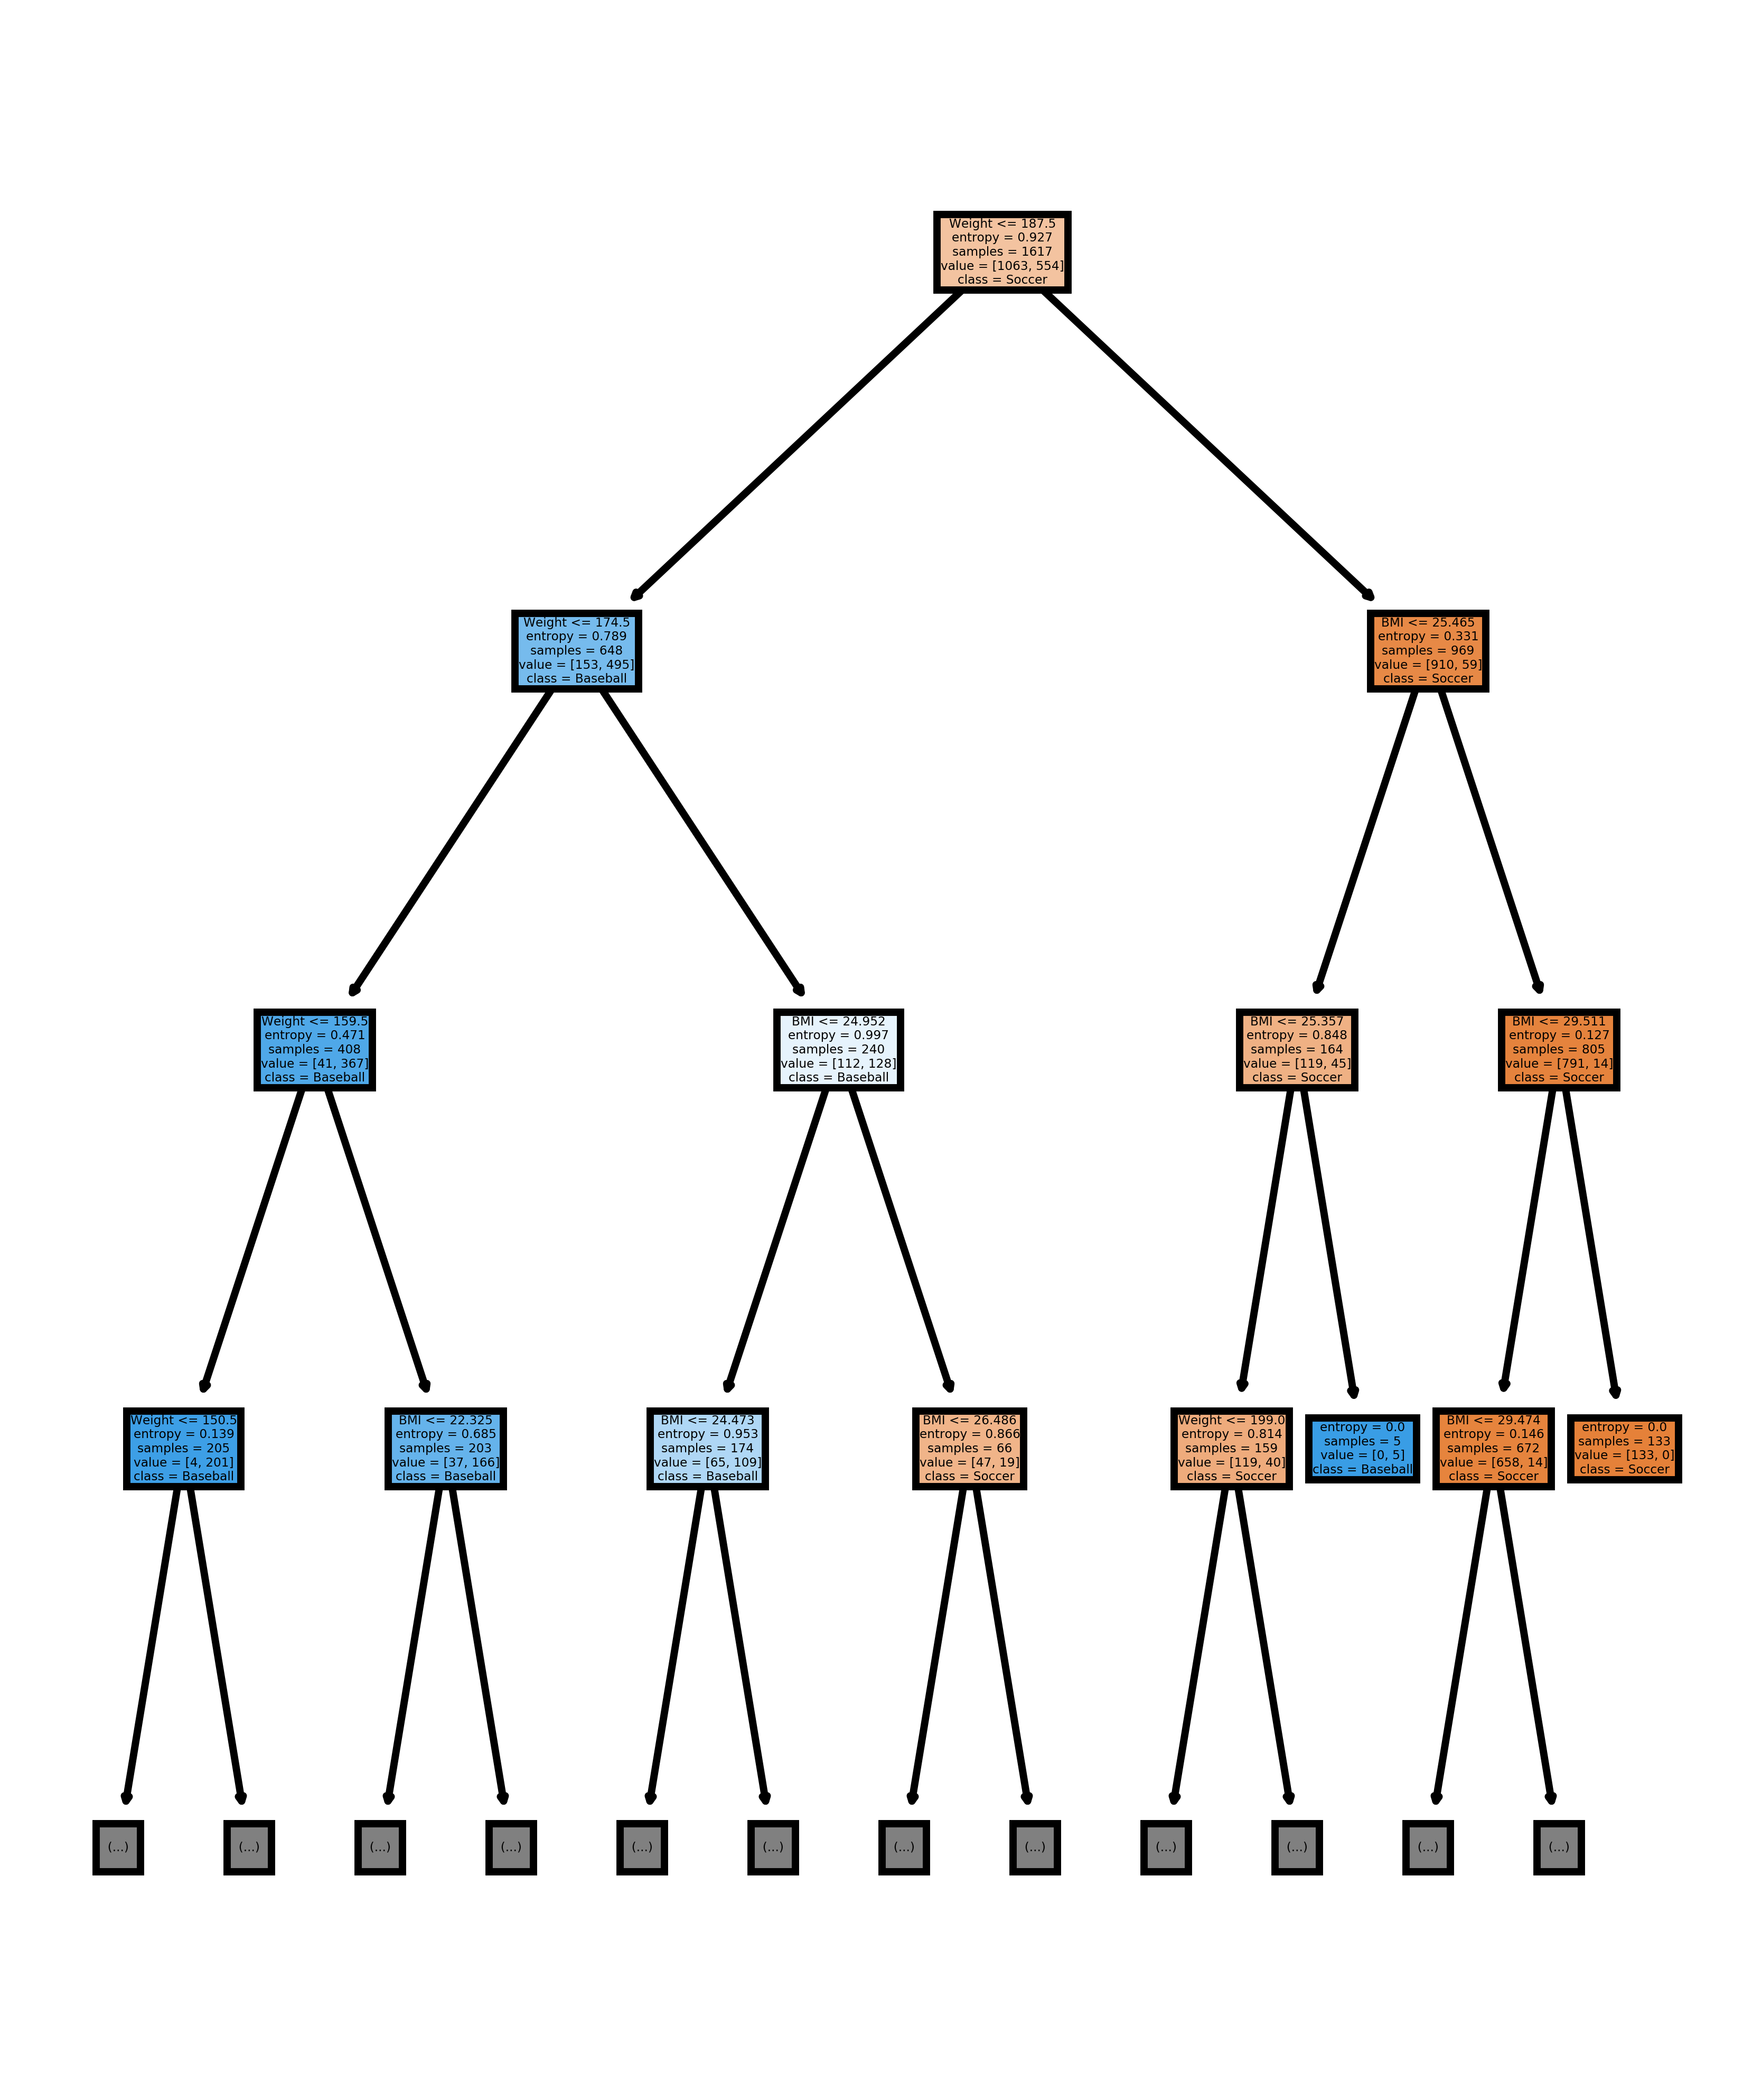

In [45]:
# Visualize the decision tree with depth of 5
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,5), dpi=1000)

plot_tree(model, feature_names = ['BMI', 'Height', 'Weight'], class_names = ['Soccer', 'Baseball'], \
          max_depth = 3, filled = True)

#### And finally, here you can see the whole decision tree and it is also printed out below. It is rather difficult to read when printed out so small with so many legs and components. 

[Text(2023.5083532219571, 3617.7083333333335, 'Weight <= 187.5\nentropy = 0.927\nsamples = 1617\nvalue = [1063, 554]\nclass = Soccer'),
 Text(1180.0715990453461, 3303.125, 'Weight <= 174.5\nentropy = 0.789\nsamples = 648\nvalue = [153, 495]\nclass = Baseball'),
 Text(386.1127684964201, 2988.541666666667, 'Weight <= 159.5\nentropy = 0.471\nsamples = 408\nvalue = [41, 367]\nclass = Baseball'),
 Text(88.78281622911695, 2673.9583333333335, 'Weight <= 150.5\nentropy = 0.139\nsamples = 205\nvalue = [4, 201]\nclass = Baseball'),
 Text(59.18854415274463, 2359.375, 'entropy = 0.0\nsamples = 109\nvalue = [0, 109]\nclass = Baseball'),
 Text(118.37708830548927, 2359.375, 'Weight <= 151.5\nentropy = 0.25\nsamples = 96\nvalue = [4, 92]\nclass = Baseball'),
 Text(59.18854415274463, 2044.7916666666667, 'Height <= 68.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]\nclass = Soccer'),
 Text(29.594272076372317, 1730.2083333333335, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = Soccer'),
 Text(88.78281

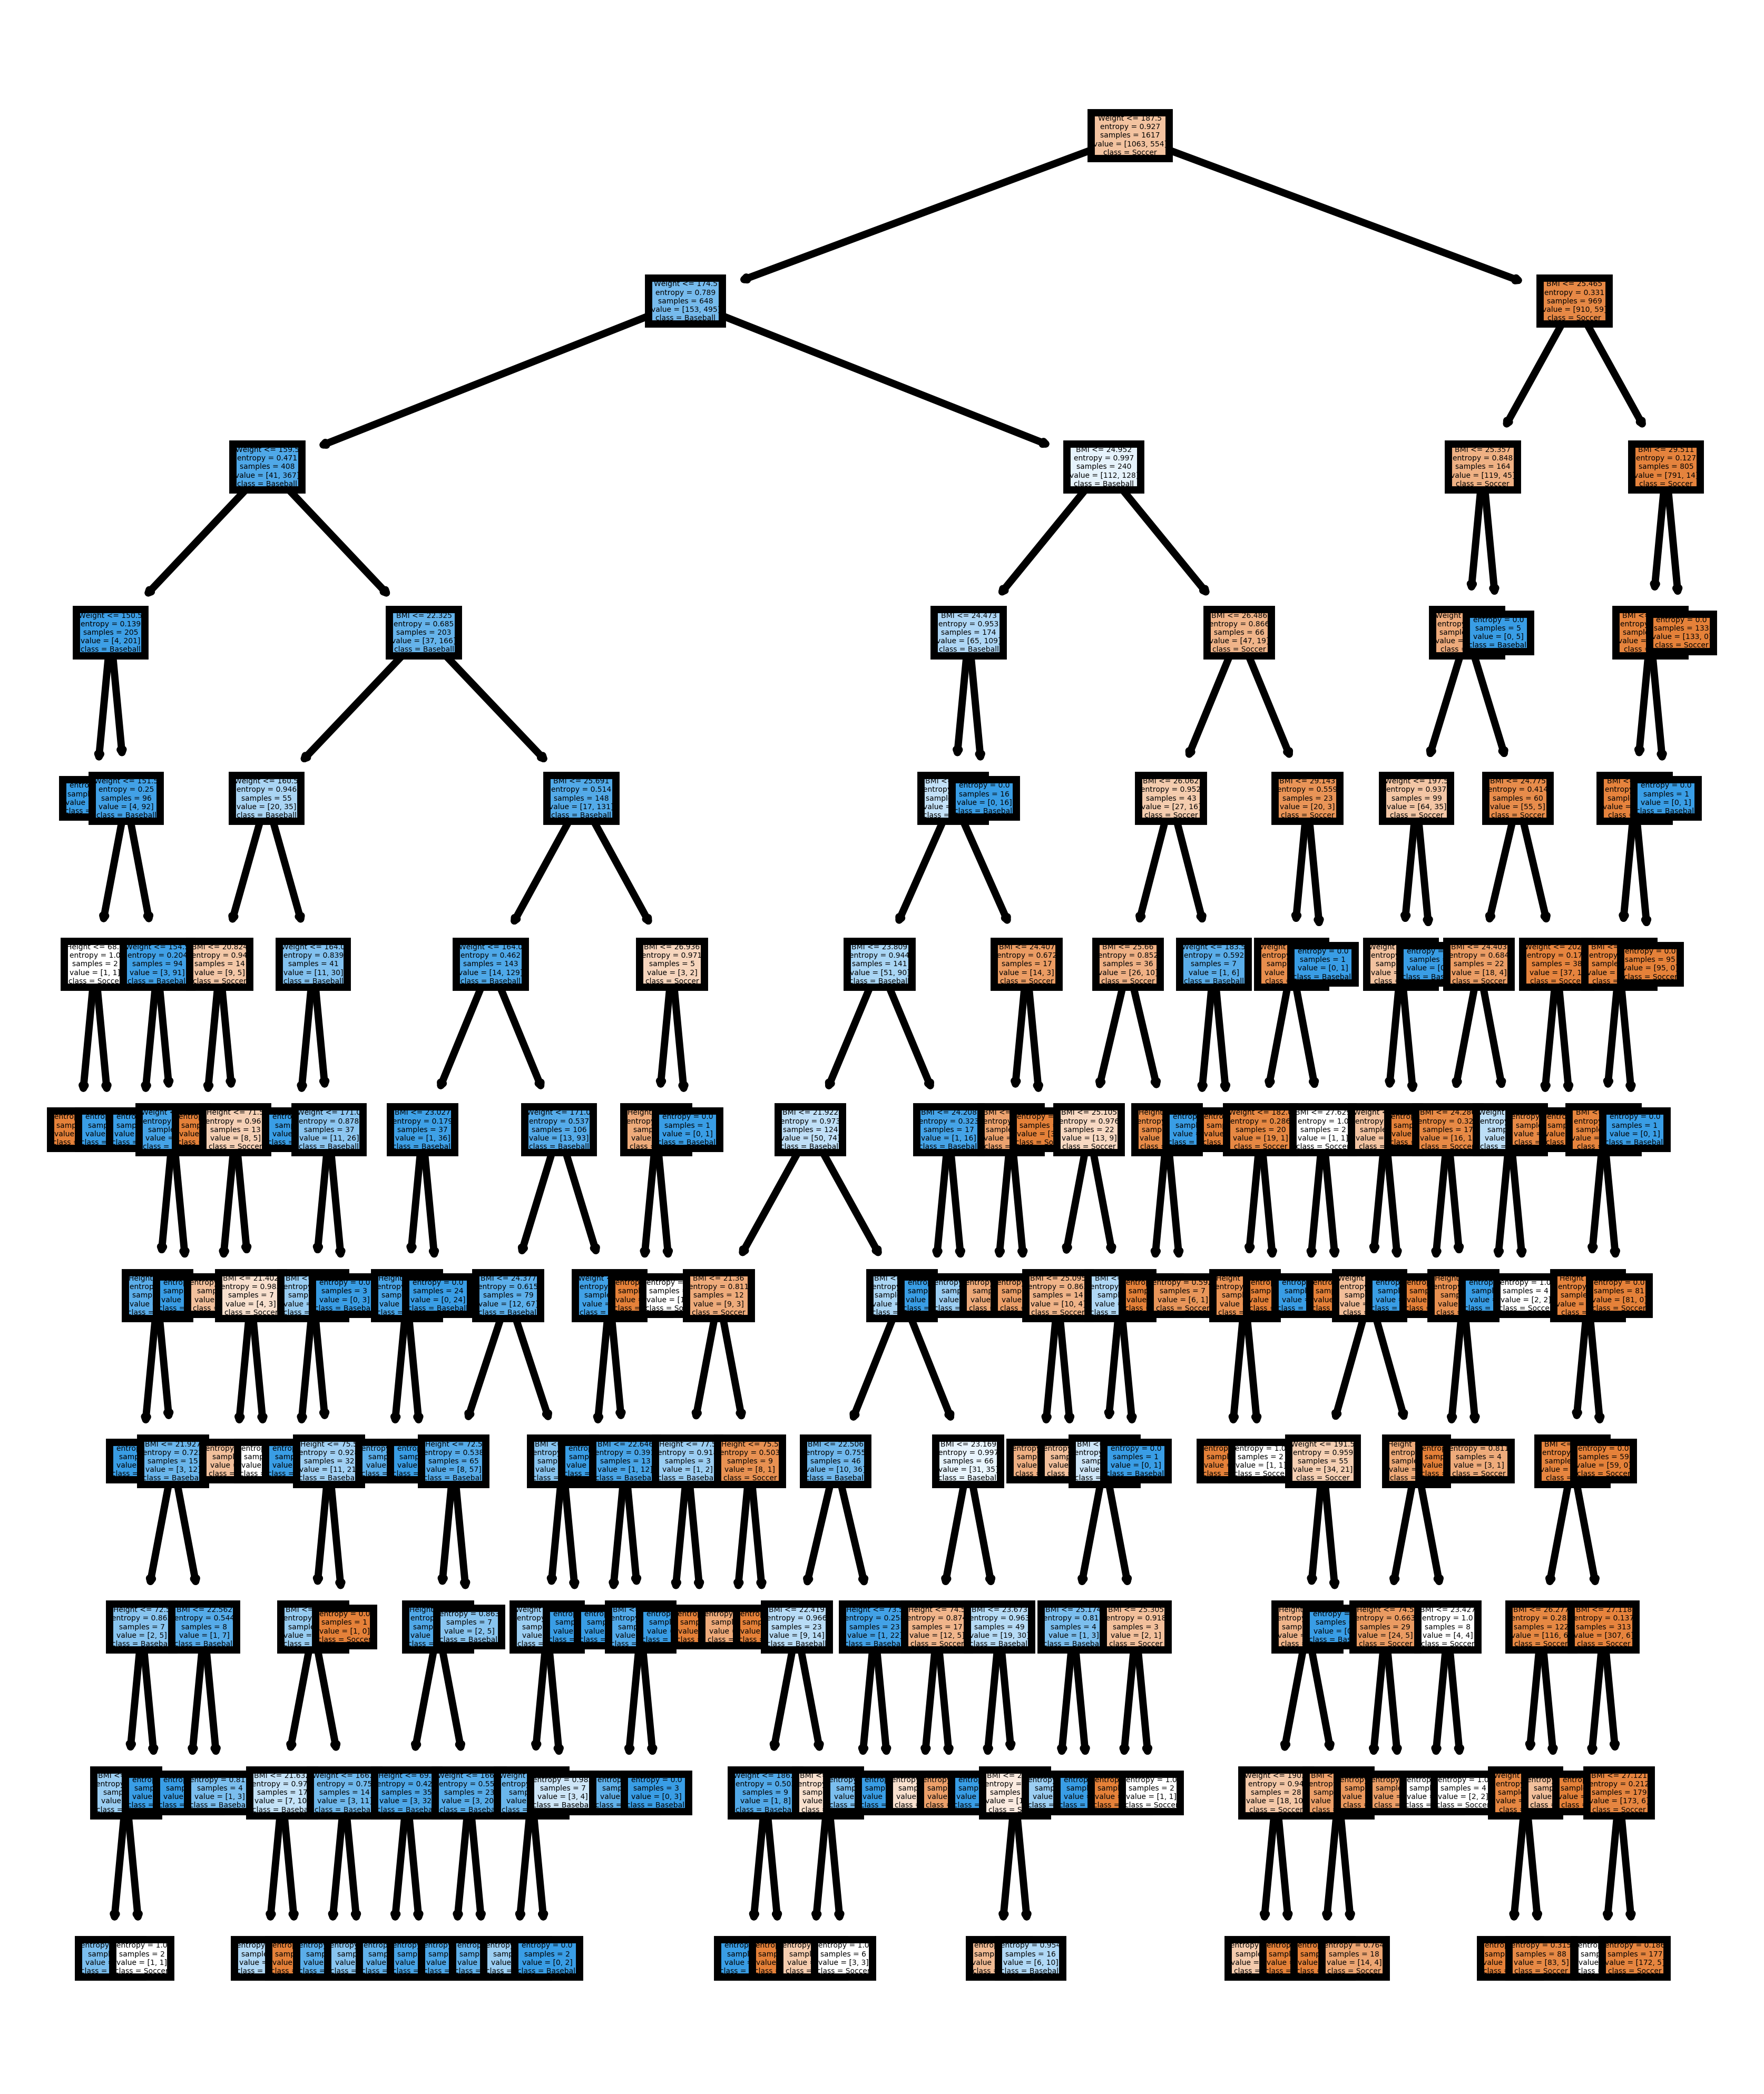

In [46]:
# Print out full decision tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,5), dpi=1000)

plot_tree(model, feature_names = ['BMI', 'Height', 'Weight'], class_names = ['Soccer', 'Baseball'], filled = True)

# Conclusion:

### These analyses led us to the following conclusions:

- Some tendancies with regards to positions and BMI can be seen across both sports such as catchers and first basemen having a higher than average BMI with respect to the full data and goalkeepers in soccer show a similar trend. This data was not concrete enough to say for certain but we found some interesting results with regards to the position specific distributions of BMI compared to the full data.

- Within soccer and baseball individually, BMI is not a good predictor of player value, neither when looking broadly at all professional players of the sport, nor when filtering by position.

- There is no statistically significant difference between height and weight regression slopes when it comes to baseball vs. soccer although there is a relatively large difference in weight intercept and mean difference in weight. This difference was extrapolated to show a significant ~20% difference in mean BMI and a ~30% difference in BMI standard deviation due to the higher variance in MLB body types when compared to soccer.

- BMI can be a solid predictor of whether an athlete plays soccer or baseball, achieving the right prediction 83% of the time using BMI normal distributions.

- We were able to improve upon this simple normal model using a machine learning decision tree to achieve an accurate prediction 90% of the time taking in BMI, height and weight as parameters.

- Our models could almost certainly be further improved with more analysis of sport dependent characteristics of players and incorperating them into our models.

### Furthermore, we are confident in our data and conclusions because we used a large sample size of some of the most prestigious sports leagues and players in the world, and because the sources of the data were reputable. Additionally, we used tried and true data analysis and interpretation methods.

### In a wider context, this data can be used for athletes training to play a particular sport. If somebody wants to train to become a pro soccer player, they can exercise with a target BMI range in mind, based on our data collection and analysis. Further, this data casts doubt on BMI as a good measure of health and fitness. Soccer players and baseball players are in general considered to be very healthy and active. Nevertheless, a huge portion of baseball players are considered either overweight or obese by the NIH’s BMI standards, and many soccer players are considered overweight as well. This indicates that it could be time to stop using BMI as an indication of health and fitness. We are confident in this conclusion as well, because not only does our reputable data support it, but BMI has been widely criticized in the media in recent years. See here for details: https://fivethirtyeight.com/features/bmi-is-a-terrible-measure-of-health/


## Source code:

### Provide a link to your Github repository (or other file hosting site) that has all of your project code (if applicable). For example, you might include web scraping code or data filtering and aggregation code.

### All source data and executed jupyter notebooks can be found at the following link to our public github repository:
https://github.com/bemphis/2950-Final-Project-bem74-tst42


## Acknowledgments:

### We would like to take this opportunity to thank Dr. Mimno and the entire INFO 2950 teaching staff for a productive and educational semester despite extraordinary circumstances. Further, we would like to thank baseball-reference.com, MLS.com, nbcsports.com, and whoscored.com for their readily accessible data, stack overflow question for their python syntax help and beautifulsoup help. Next, we would like to thank INFO 1998 and Cornell Data Science as these resources helped us implement the machine learning model. Finally, we would like to thank the mathematicians and statisticians who made this work so easy.